In [1]:
import tensorflow as tf
from tensorflow import keras #keras is an api
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

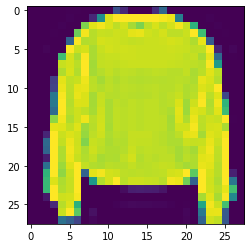

In [5]:
plt.imshow(train_images[7])

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

In [18]:
train_images.shape

(60000, 28, 28)

In [7]:
model = keras.Sequential([ #sequence of layers
    keras.layers.Flatten(input_shape=(28,28)),
    #dense layer: fully connected layer
    keras.layers.Dense(128, activation="relu"), #relu: rectified linear unit
    keras.layers.Dense(10, activation="softmax")
    #Softmax converts a vector of values to a probability distribution.
    #The elements of the output vector are in range (0, 1) and sum to 1.
    #Softmax is often used as the activation for the last layer of a classification network 
    #because the result could be interpreted as a probability distribution.
    ])

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#Optimizer: This is how the model is updated based on the data it sees and its loss function.
#Metrics: Used to monitor the training and testing steps. This example uses accuracy, 
#the fraction of the images that are correctly classified.

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5019 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3758 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3351 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3131 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2955 - accuracy: 0.8904


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 901us/step - loss: 0.3685 - accuracy: 0.8661


In [11]:
prediction = model.predict(test_images)

In [12]:
prediction[0]

array([4.8870011e-06, 9.2206454e-07, 1.7945812e-06, 4.0659614e-08,
       2.5442828e-06, 4.9582142e-03, 1.6418597e-05, 1.5427174e-01,
       1.5466148e-05, 8.4072804e-01], dtype=float32)

In [13]:
np.argmax(prediction[0]) #index of the biggest number in that array

9

In [14]:
class_names[np.argmax(prediction[0])]

'Ankle boot'

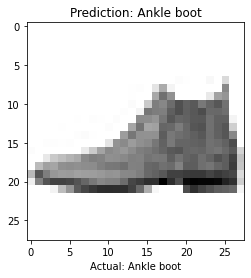

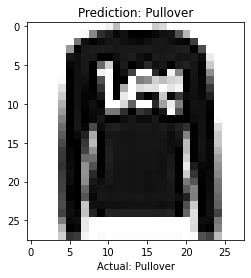

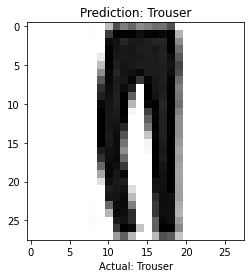

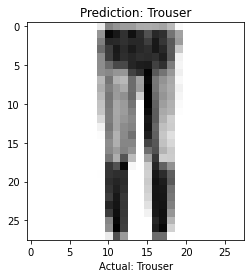

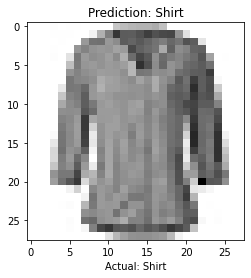

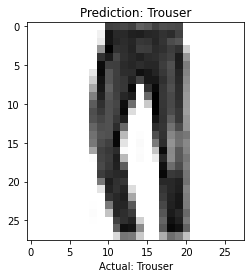

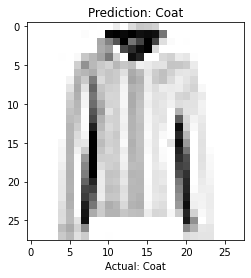

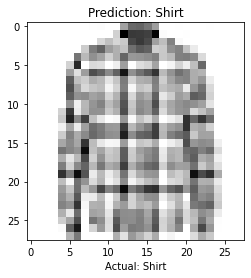

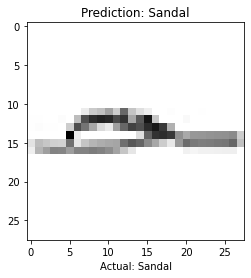

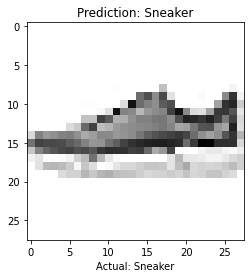

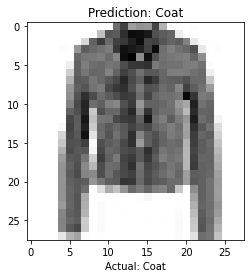

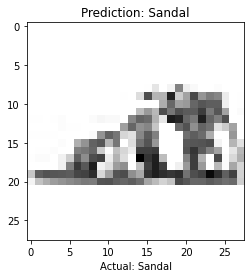

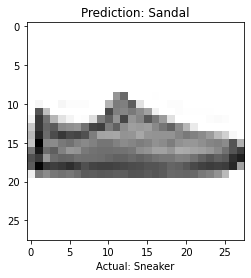

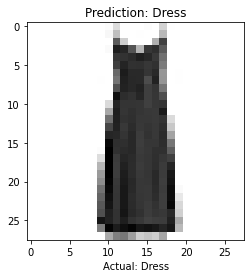

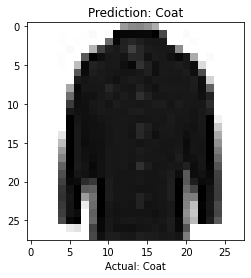

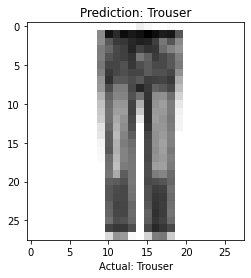

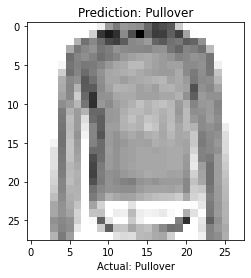

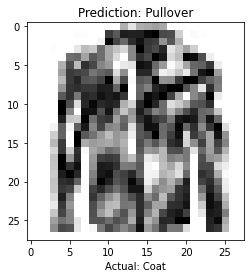

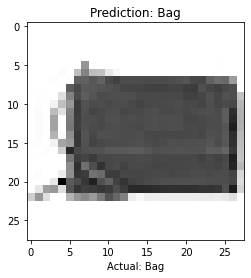

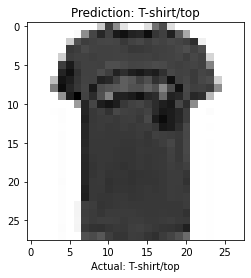

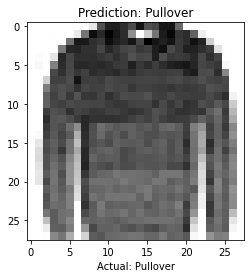

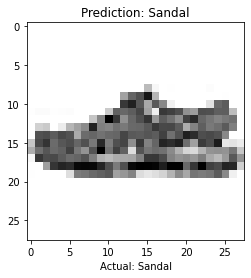

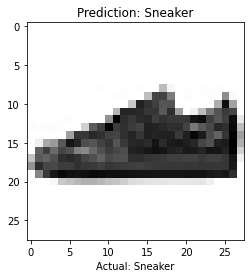

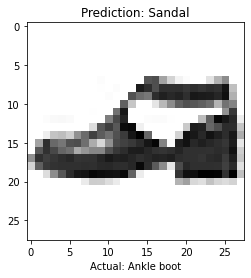

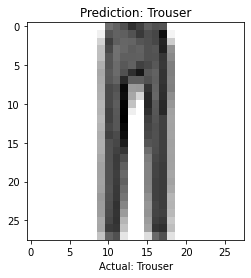

In [15]:
for i in range(25):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()